# Beat-finding using autocorrelations
In this snippet we learn how to do some beat-finding using autocorrelations.

First, let's import the necessary functions and classes:

In [1]:
from thebeat.core import Sequence
from thebeat.stats import acf_df, acf_plot, acf_values
import numpy as np
import scipy.signal

In [2]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

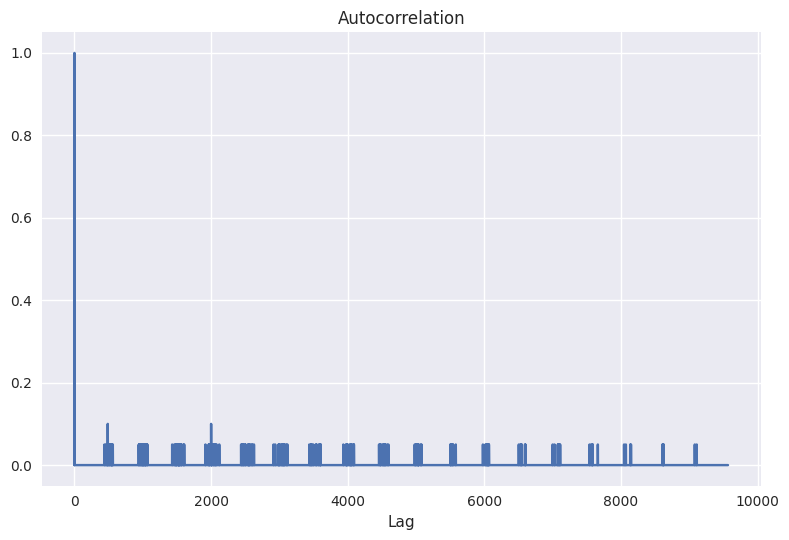

In [19]:
# We use a Generator object with a seed so you will get the same results as we:
rng = np.random.default_rng(seed=123)

seq = Sequence.generate_random_normal(n=20, mu=500, sigma=40, rng=rng)
acf_plot(seq);

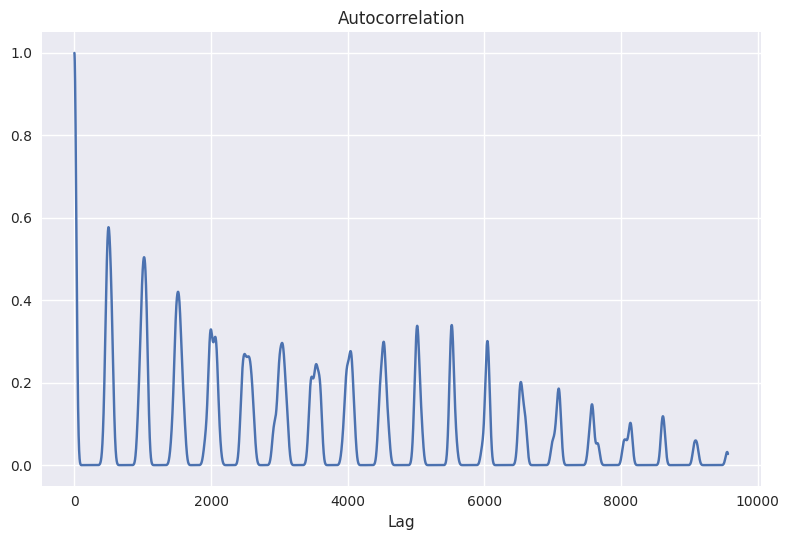

In [20]:
acf_plot(seq, smoothing_window=100, smoothing_sd=20);

In [22]:
# We use a Generator object with a seed so you will get the same results as we:
correlation_factors = acf_values(seq, resolution=1, smoothing_window=100, smoothing_sd=20)

peaks = scipy.signal.find_peaks(correlation_factors)
print(peaks)

(array([ 493, 1026, 1527, 1993, 2085, 2480, 2571, 2911, 3012, 3061, 3458,
       3547, 3607, 3986, 4058, 4536, 5021, 5528, 6057, 6542, 6608, 7112,
       7595, 7700, 8076, 8174, 8643, 9124, 9569]), {})


In [23]:
resolution = 10

correlation_factors = acf_values(seq,
                                 resolution=resolution,
                                 smoothing_window=100,
                                 smoothing_sd=20)

peaks = scipy.signal.find_peaks(correlation_factors)
peaks = peaks[0] * resolution
print(peaks)

[  10  490 1030 1540 1640 2100 2520 2570 2670 3100 3600 4050 4550]


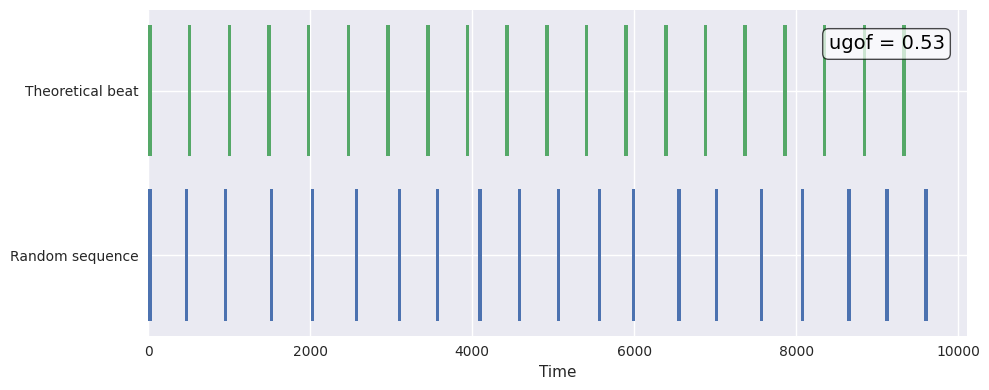

In [30]:
# Plot
from thebeat.visualization import plot_multiple_sequences
from thebeat.stats import get_ugof

# Make isochronous sequence
seq_isoc = Sequence.generate_isochronous(n=20, ioi=peaks[1])

fig, ax = plot_multiple_sequences([seq_isoc, seq], 
                                  figsize=(10, 4),
                                  y_axis_labels=['Theoretical beat', 'Random sequence'], 
                                  suppress_display=True)


# Add box with ugof
ugof_round = str(round(get_ugof(seq, peaks[1]), 2))
box_properties = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(8400, 1.25, s=f"ugof = {ugof_round}", bbox=box_properties, fontsize=14);
fig.show()

In [31]:
seq = Sequence.generate_random_normal(n=20, mu=500, sigma=25, rng=rng)

df = acf_df(seq, smoothing_window=10, smoothing_sd=2)
print(df)

      time_ms  correlation
0           0     0.931255
1           1     1.000000
2           2     0.931255
3           3     0.763098
4           4     0.548497
...       ...          ...
9623     9623     0.023837
9624     9624     0.014014
9625     9625     0.006382
9626     9626     0.001945
9627     9627     0.000000

[9628 rows x 2 columns]


Let's sort this dataframe by the correlation factor:

In [32]:
df = df.sort_values(by="correlation", ascending=False)
print(df)

      time_ms  correlation
1           1     1.000000
0           0     0.931255
2           2     0.931255
3           3     0.763098
4           4     0.548497
...       ...          ...
3774     3774     0.000000
3773     3773     0.000000
3772     3772     0.000000
3771     3771     0.000000
9627     9627     0.000000

[9628 rows x 2 columns]
